# Import statements

In [0]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim as optim

# Select Device

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Load dataset and declare training parameters

In [0]:
training_parameters = {
    "n_epochs": 100,
    "batch_size": 100,
}
data_loader = torch.utils.data.DataLoader(
  
  datasets.MNIST('./', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=training_parameters["batch_size"], shuffle=True)

In [11]:
num_batches = len(data_loader)
print("Number of batches: ",num_batches)

Number of batches:  600


# Display an iamge

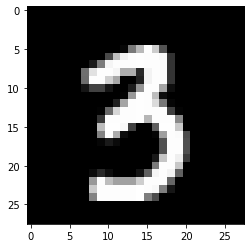

In [12]:
%matplotlib inline 
from matplotlib import pyplot as plt

for x,_ in data_loader:
    plt.imshow(x.numpy()[0][0], cmap='gray')
    break

# Define Generator and Discriminator

In [43]:
class GeneratorModel(nn.Module):
    def __init__(self):
        super(GeneratorModel, self).__init__()
        input_dim = 100
        output_dim = 784

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )
    
    def forward(self, x):
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output.to(device)

class DiscriminatorModel(nn.Module):
    def __init__(self):
        super(DiscriminatorModel, self).__init__()
        input_dim = 784
        output_dim = 1

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)

        return output.to(device)

discriminator = DiscriminatorModel()
generator = GeneratorModel()
discriminator.to(device)
generator.to(device)

GeneratorModel(
  (hidden_layer1): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer2): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer3): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer4): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

# Initilize Optimizers, loss function


In [0]:
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

loss = nn.BCELoss()


# Training Loop

[0/100]: loss_d: 0.381, loss_g: 4.099
[1/100]: loss_d: 0.473, loss_g: 2.582
[2/100]: loss_d: 0.523, loss_g: 1.514
[3/100]: loss_d: 0.494, loss_g: 1.706
[4/100]: loss_d: 0.396, loss_g: 2.373
[5/100]: loss_d: 0.265, loss_g: 3.061
[6/100]: loss_d: 0.285, loss_g: 2.603
[7/100]: loss_d: 0.283, loss_g: 2.580
[8/100]: loss_d: 0.311, loss_g: 2.397
Training Steps Completed:  499


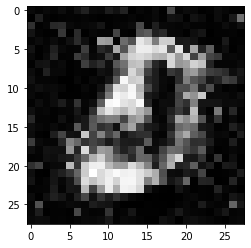

[9/100]: loss_d: 0.258, loss_g: 2.742
[10/100]: loss_d: 0.306, loss_g: 2.627
[11/100]: loss_d: 0.363, loss_g: 2.137
[12/100]: loss_d: 0.362, loss_g: 2.063
[13/100]: loss_d: 0.380, loss_g: 1.992
[14/100]: loss_d: 0.380, loss_g: 1.961
[15/100]: loss_d: 0.429, loss_g: 1.766
[16/100]: loss_d: 0.418, loss_g: 1.781
[17/100]: loss_d: 0.421, loss_g: 1.735
[18/100]: loss_d: 0.436, loss_g: 1.738
Training Steps Completed:  499


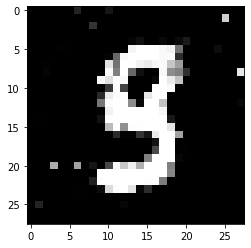

[19/100]: loss_d: 0.445, loss_g: 1.676
[20/100]: loss_d: 0.450, loss_g: 1.605
[21/100]: loss_d: 0.452, loss_g: 1.600
[22/100]: loss_d: 0.447, loss_g: 1.620
[23/100]: loss_d: 0.477, loss_g: 1.505
[24/100]: loss_d: 0.487, loss_g: 1.466
[25/100]: loss_d: 0.489, loss_g: 1.481
[26/100]: loss_d: 0.496, loss_g: 1.436
[27/100]: loss_d: 0.478, loss_g: 1.516
[28/100]: loss_d: 0.486, loss_g: 1.485
Training Steps Completed:  499


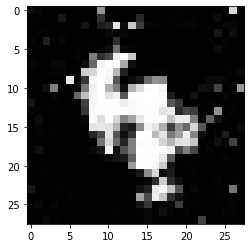

[29/100]: loss_d: 0.510, loss_g: 1.372
[30/100]: loss_d: 0.507, loss_g: 1.383
[31/100]: loss_d: 0.502, loss_g: 1.393
[32/100]: loss_d: 0.518, loss_g: 1.328
[33/100]: loss_d: 0.518, loss_g: 1.321
[34/100]: loss_d: 0.526, loss_g: 1.302
[35/100]: loss_d: 0.529, loss_g: 1.290
[36/100]: loss_d: 0.538, loss_g: 1.250
[37/100]: loss_d: 0.540, loss_g: 1.237
[38/100]: loss_d: 0.550, loss_g: 1.208
Training Steps Completed:  499


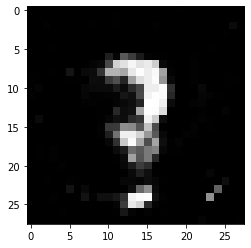

[39/100]: loss_d: 0.553, loss_g: 1.185
[40/100]: loss_d: 0.556, loss_g: 1.184
[41/100]: loss_d: 0.557, loss_g: 1.177
[42/100]: loss_d: 0.556, loss_g: 1.175
[43/100]: loss_d: 0.559, loss_g: 1.187
[44/100]: loss_d: 0.562, loss_g: 1.156
[45/100]: loss_d: 0.565, loss_g: 1.151
[46/100]: loss_d: 0.569, loss_g: 1.138
[47/100]: loss_d: 0.565, loss_g: 1.155
[48/100]: loss_d: 0.575, loss_g: 1.115
Training Steps Completed:  499


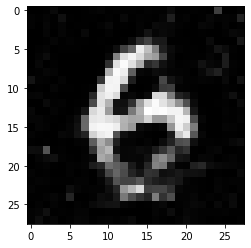

[49/100]: loss_d: 0.578, loss_g: 1.100
[50/100]: loss_d: 0.577, loss_g: 1.108
[51/100]: loss_d: 0.579, loss_g: 1.117
[52/100]: loss_d: 0.583, loss_g: 1.066
[53/100]: loss_d: 0.588, loss_g: 1.075
[54/100]: loss_d: 0.592, loss_g: 1.054
[55/100]: loss_d: 0.595, loss_g: 1.044
[56/100]: loss_d: 0.594, loss_g: 1.040
[57/100]: loss_d: 0.596, loss_g: 1.037
[58/100]: loss_d: 0.596, loss_g: 1.046
Training Steps Completed:  499


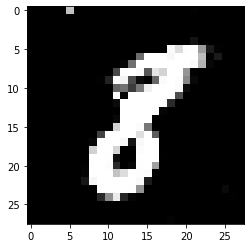

[59/100]: loss_d: 0.599, loss_g: 1.031
[60/100]: loss_d: 0.598, loss_g: 1.032
[61/100]: loss_d: 0.604, loss_g: 1.008
[62/100]: loss_d: 0.601, loss_g: 1.010
[63/100]: loss_d: 0.605, loss_g: 1.016
[64/100]: loss_d: 0.605, loss_g: 1.007
[65/100]: loss_d: 0.612, loss_g: 0.994
[66/100]: loss_d: 0.608, loss_g: 0.990
[67/100]: loss_d: 0.606, loss_g: 0.994
[68/100]: loss_d: 0.601, loss_g: 1.023
Training Steps Completed:  499


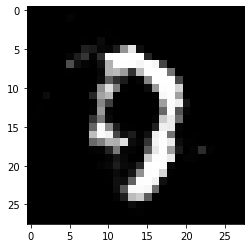

[69/100]: loss_d: 0.606, loss_g: 1.004
[70/100]: loss_d: 0.614, loss_g: 0.993
[71/100]: loss_d: 0.611, loss_g: 0.993
[72/100]: loss_d: 0.615, loss_g: 0.974
[73/100]: loss_d: 0.614, loss_g: 0.979
[74/100]: loss_d: 0.610, loss_g: 0.990
[75/100]: loss_d: 0.611, loss_g: 0.988
[76/100]: loss_d: 0.613, loss_g: 0.980
[77/100]: loss_d: 0.611, loss_g: 0.984
[78/100]: loss_d: 0.621, loss_g: 0.954
Training Steps Completed:  499


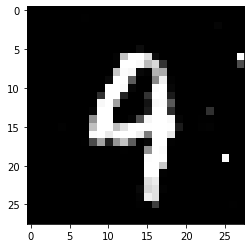

[79/100]: loss_d: 0.615, loss_g: 0.974
[80/100]: loss_d: 0.617, loss_g: 0.961
[81/100]: loss_d: 0.622, loss_g: 0.946
[82/100]: loss_d: 0.624, loss_g: 0.953
[83/100]: loss_d: 0.624, loss_g: 0.947
[84/100]: loss_d: 0.624, loss_g: 0.939
[85/100]: loss_d: 0.623, loss_g: 0.952
[86/100]: loss_d: 0.621, loss_g: 0.947
[87/100]: loss_d: 0.625, loss_g: 0.938
[88/100]: loss_d: 0.622, loss_g: 0.948
Training Steps Completed:  499


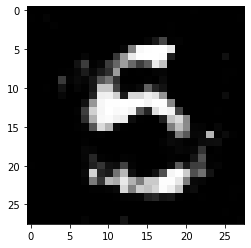

[89/100]: loss_d: 0.625, loss_g: 0.953
[90/100]: loss_d: 0.625, loss_g: 0.948
[91/100]: loss_d: 0.623, loss_g: 0.948
[92/100]: loss_d: 0.626, loss_g: 0.941
[93/100]: loss_d: 0.625, loss_g: 0.949
[94/100]: loss_d: 0.626, loss_g: 0.935
[95/100]: loss_d: 0.628, loss_g: 0.937
[96/100]: loss_d: 0.628, loss_g: 0.935
[97/100]: loss_d: 0.628, loss_g: 0.920
[98/100]: loss_d: 0.631, loss_g: 0.925
Training Steps Completed:  499


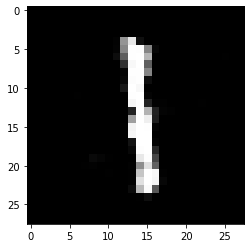

[99/100]: loss_d: 0.633, loss_g: 0.912


In [44]:
n_epochs = training_parameters["n_epochs"]
batch_size = training_parameters["batch_size"]

for epoch_idx in range(n_epochs):
    G_loss = []
    D_loss = []
    for batch_idx, data_input in enumerate(data_loader):
        
        
        noise = torch.randn(batch_size,100).to(device)
        generated_data = generator(noise) # batch_size X 784
        
        # Discriminator
        true_data = data_input[0].view(batch_size, 784).to(device) # batch_size X 784
        digit_labels = data_input[1] # batch_size
        true_labels = torch.ones(batch_size).to(device)
        
        discriminator_optimizer.zero_grad()

        discriminator_output_for_true_data = discriminator(true_data).view(batch_size)
        true_discriminator_loss = loss(discriminator_output_for_true_data, true_labels)

        discriminator_output_for_generated_data = discriminator(generated_data.detach()).view(batch_size)
        generator_discriminator_loss = loss(
            discriminator_output_for_generated_data, torch.zeros(batch_size).to(device)
        )
        discriminator_loss = (
            true_discriminator_loss + generator_discriminator_loss
        ) / 2
        
        discriminator_loss.backward()
        discriminator_optimizer.step()

        D_loss.append(discriminator_loss.data.item())
        
        
        # Generator

        generator_optimizer.zero_grad()
        # It's a choice to generate the data again
        generated_data = generator(noise) # batch_size X 784
        discriminator_output_on_generated_data = discriminator(generated_data).view(batch_size)
        generator_loss = loss(discriminator_output_on_generated_data, true_labels)
        generator_loss.backward()
        generator_optimizer.step()
        
        G_loss.append(generator_loss.data.item())
        if ((batch_idx + 1)% 500 == 0 and (epoch_idx + 1)%10 == 0):
            print("Training Steps Completed: ", batch_idx)
            
            with torch.no_grad():
                noise = torch.randn(batch_size,100).to(device)
                generated_data = generator(noise).cpu().view(batch_size, 28, 28)
                for x in generated_data:
                    plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
                    plt.show()

                    break


    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch_idx), n_epochs, torch.mean(torch.FloatTensor(D_loss)), torch.mean(torch.FloatTensor(G_loss))))
    

# The below version is not working - need to figure out the issue

In [0]:
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

loss = nn.BCELoss()
n_epochs = training_parameters["n_epochs"]
batch_size = training_parameters["batch_size"]

for epoch_idx in range(n_epochs):
    G_loss = []
    D_loss = []
    
    for batch_idx, data_input in enumerate(data_loader):

        # Generator
        generator_optimizer.zero_grad()

        noise = torch.randn(batch_size, 100).to(device)
        generated_data = generator(noise) # batch_size X 784

        true_data = data_input[0].view(batch_size, 784).to(device) # batch_size X 784
        digit_labels = data_input[1] # batch_size
        true_labels = torch.ones(batch_size).to(device)



        discriminator_output_on_generated_data = discriminator(generated_data).view(batch_size)
        generator_loss = loss(discriminator_output_on_generated_data, true_labels)
        generator_loss.backward()
        generator_optimizer.step()
        
        G_loss.append(generator_loss.data.item())
        
        # Discriminator
        
        discriminator_optimizer.zero_grad()

        discriminator_output_for_true_data = discriminator(true_data).view(batch_size)
        true_discriminator_loss = loss(discriminator_output_for_true_data, true_labels)

        discriminator_output_for_generated_data = discriminator(generated_data.detach()).view(batch_size)
        generator_discriminator_loss = loss(
            discriminator_output_for_generated_data, torch.zeros(batch_size).to(device)
        )
        discriminator_loss = (
            true_discriminator_loss + generator_discriminator_loss
        ) / 2

        discriminator_loss.backward()
        discriminator_optimizer.step()

        D_loss.append(discriminator_loss.data.item())
        
        if ((batch_idx + 1)% 500 == 0 and (epoch_idx + 1)%10 == 0):
            print("Training Steps Completed: ", batch_idx)
            
            with torch.no_grad():
                noise = torch.randn(batch_size,100).to(device)
                generated_data = generator(noise).cpu().view(batch_size, 28, 28)
                for x in generated_data:
                    plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
                    plt.show()

                    break


            
    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch_idx), n_epochs, torch.mean(torch.FloatTensor(D_loss)), torch.mean(torch.FloatTensor(G_loss))))